# SHAPE nucleotide reactivity value prediction using Feedforward Neural Network
---



## Requirements:
- Python 3
- Dictionaries & Lists
- Numpy
- Pandas
- Pytorch

## Software Used:
-	Google Colab or Jupyter Notebook


### Importing Relevant Libraries


---


Note: 
- If You do no have them installed, Run **!pip install "Library Name here"**. For Example, if I want to install **numpy**, I will write !pip install numpy


In [1]:
import numpy as np
import pandas as pd
import random
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Creating Training Data: 
We will transform the data into a format that our PyTorch Model can Easily Understand


20 x : 1 y

In [2]:
# Sliding window with window size 21, the middle value as target value y, the other 20 values as x
# xxxxxxxxxxyxxxxxxxxxx

X = []
y = []
window_size = 21

def sliding_window_extraction(df):
    length = df.shape[0]
    for index in range(length-20):
        x_i = []
        for k in range(index, index+window_size):
            x_i.append(df['reactivity'][k])
        # remove the 11th element y from 21 elements
        x_i.pop(10)
        X.append(x_i)
        y.append(df['reactivity'][index+10])


In [3]:
df = pd.read_csv(entry, delimiter = "\t", header=None, names=["index", "reactivity"])
print(df.shape)
df_v = df[df['reactivity']!=-999]
print(df_v.shape)
df_v = df_v.reset_index(drop=True)
print(df_v)
sliding_window_extraction(df_v)

NameError: name 'entry' is not defined

In [7]:
# Read the data file from the folder

entries = os.scandir(r'./shape')
i = 0

for entry in entries:
    df = pd.read_csv(entry, delimiter = "\t", header=None, names=["index", "reactivity"])
    print(df)
    df_v = df[df['reactivity']!=-999]
    print(df_v)
    df_v = df_v.reset_index(drop=True)
    print(df_v)
    sliding_window_extraction(df_v)
    i = i+1

print('the number of files: ', i)


    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3   -0.044254
3       4    0.174412
4       5    0.028481
..    ...         ...
70     71   -0.240080
71     72    0.090889
72     73   -0.123587
73     74    0.292660
74     75 -999.000000

[75 rows x 2 columns]
    index  reactivity
2       3   -0.044254
3       4    0.174412
4       5    0.028481
5       6    0.263270
6       7    0.238318
..    ...         ...
69     70    0.079597
70     71   -0.240080
71     72    0.090889
72     73   -0.123587
73     74    0.292660

[72 rows x 2 columns]
    index  reactivity
0       3   -0.044254
1       4    0.174412
2       5    0.028481
3       6    0.263270
4       7    0.238318
..    ...         ...
67     70    0.079597
68     71   -0.240080
69     72    0.090889
70     73   -0.123587
71     74    0.292660

[72 rows x 2 columns]
    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3   -0.041852
3       4    0.070692
4       5    0.384352
5      

     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3    0.032739
3        4    0.105669
4        5    0.059500
..     ...         ...
152    153    0.240825
153    154    0.022308
154    155    0.500497
155    156 -999.000000
156    157 -999.000000

[157 rows x 2 columns]
     index  reactivity
2        3    0.032739
3        4    0.105669
4        5    0.059500
5        6    0.103273
7        8   -0.045530
..     ...         ...
150    151   -0.023990
151    152    0.069372
152    153    0.240825
153    154    0.022308
154    155    0.500497

[149 rows x 2 columns]
     index  reactivity
0        3    0.032739
1        4    0.105669
2        5    0.059500
3        6    0.103273
4        8   -0.045530
..     ...         ...
144    151   -0.023990
145    152    0.069372
146    153    0.240825
147    154    0.022308
148    155    0.500497

[149 rows x 2 columns]
    index  reactivity
0       1        -999
1       2        -999
2       3        -999
3       4   

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    1.729584
3       4    0.961531
4       5    0.577140
5       6    0.233999
6       7    0.052711
7       8    0.456524
8       9    0.308959
9      10    0.384945
10     11    0.036661
11     12   -0.083997
12     13    0.552428
13     14    0.173650
14     15    0.917436
15     16    0.280839
16     17    0.786287
17     18    0.243992
18     19    0.009739
19     20    0.110987
20     21    0.664698
21     22    0.032706
22     23    0.394588
23     24    0.469751
24     25    0.295259
25     26    0.607278
26     27    0.069765
27     28    0.137199
28     29    0.822831
29     30    0.066160
30     31    0.030892
31     32    0.691983
32     33    0.709118
33     34    1.690148
34     35   -0.130840
35     36    0.486278
36     37    0.394705
37     38    1.256691
38     39    1.985531
39     40    1.316726
40     41    0.246182
41     42    0.814948
42     43    0.109284
43     44    1.687708
44     45 

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    1.142490
3       4    0.475757
4       5    0.178697
..    ...         ...
67     68   -0.013897
68     69    0.077168
69     70    0.169313
70     71    0.240754
71     72 -999.000000

[72 rows x 2 columns]
    index  reactivity
2       3    1.142490
3       4    0.475757
4       5    0.178697
5       6    0.090090
6       7    0.894179
..    ...         ...
66     67    0.827606
67     68   -0.013897
68     69    0.077168
69     70    0.169313
70     71    0.240754

[69 rows x 2 columns]
    index  reactivity
0       3    1.142490
1       4    0.475757
2       5    0.178697
3       6    0.090090
4       7    0.894179
..    ...         ...
64     67    0.827606
65     68   -0.013897
66     69    0.077168
67     70    0.169313
68     71    0.240754

[69 rows x 2 columns]
    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    0.010103
3       4   -0.505241
4       5    0.478278
5      

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3   -0.346772
3       4    0.308547
4       5    0.096292
..    ...         ...
69     70    0.157933
70     71    0.194971
71     72   -0.084070
72     73   -0.221625
73     74 -999.000000

[74 rows x 2 columns]
    index  reactivity
2       3   -0.346772
3       4    0.308547
4       5    0.096292
5       6    0.319442
6       7    0.037134
..    ...         ...
68     69    0.197412
69     70    0.157933
70     71    0.194971
71     72   -0.084070
72     73   -0.221625

[71 rows x 2 columns]
    index  reactivity
0       3   -0.346772
1       4    0.308547
2       5    0.096292
3       6    0.319442
4       7    0.037134
..    ...         ...
66     69    0.197412
67     70    0.157933
68     71    0.194971
69     72   -0.084070
70     73   -0.221625

[71 rows x 2 columns]
    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3   -0.225147
3       4    0.271576
4       5    0.163601
..    .

     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3    0.221407
3        4    0.338286
4        5    0.060102
..     ...         ...
106    107    0.130204
107    108    0.083073
108    109    0.360119
109    110    0.331378
110    111 -999.000000

[111 rows x 2 columns]
     index  reactivity
2        3    0.221407
3        4    0.338286
4        5    0.060102
5        6   -0.008582
6        7    0.118795
..     ...         ...
105    106    0.205877
106    107    0.130204
107    108    0.083073
108    109    0.360119
109    110    0.331378

[108 rows x 2 columns]
     index  reactivity
0        3    0.221407
1        4    0.338286
2        5    0.060102
3        6   -0.008582
4        7    0.118795
..     ...         ...
103    106    0.205877
104    107    0.130204
105    108    0.083073
106    109    0.360119
107    110    0.331378

[108 rows x 2 columns]
     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3    0.475442
3       

     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3    0.090567
3        4   -0.088037
4        5    0.415460
..     ...         ...
146    147   -0.251366
147    148    0.346987
148    149   -0.018265
149    150    1.301419
150    151 -999.000000

[151 rows x 2 columns]
     index  reactivity
2        3    0.090567
3        4   -0.088037
4        5    0.415460
5        6    0.044498
6        7    0.098532
..     ...         ...
145    146   -0.146341
146    147   -0.251366
147    148    0.346987
148    149   -0.018265
149    150    1.301419

[148 rows x 2 columns]
     index  reactivity
0        3    0.090567
1        4   -0.088037
2        5    0.415460
3        6    0.044498
4        7    0.098532
..     ...         ...
143    146   -0.146341
144    147   -0.251366
145    148    0.346987
146    149   -0.018265
147    150    1.301419

[148 rows x 2 columns]
     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3    0.382993
3       

     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3    0.115177
3        4    0.368370
4        5    0.216092
..     ...         ...
130    131    0.168092
131    132    0.282062
132    133    0.199263
133    134   -0.151526
134    135 -999.000000

[135 rows x 2 columns]
     index  reactivity
2        3    0.115177
3        4    0.368370
4        5    0.216092
5        6   -0.001397
6        7    0.296731
..     ...         ...
129    130    0.621671
130    131    0.168092
131    132    0.282062
132    133    0.199263
133    134   -0.151526

[132 rows x 2 columns]
     index  reactivity
0        3    0.115177
1        4    0.368370
2        5    0.216092
3        6   -0.001397
4        7    0.296731
..     ...         ...
127    130    0.621671
128    131    0.168092
129    132    0.282062
130    133    0.199263
131    134   -0.151526

[132 rows x 2 columns]
     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3 -999.000000
3       

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    0.221966
3       4   -0.163794
4       5    0.370272
..    ...         ...
63     64    0.429222
64     65    0.655815
65     66    0.557330
66     67   -0.052173
67     68 -999.000000

[68 rows x 2 columns]
    index  reactivity
2       3    0.221966
3       4   -0.163794
4       5    0.370272
5       6   -0.107893
6       7    0.253084
..    ...         ...
62     63    0.460416
63     64    0.429222
64     65    0.655815
65     66    0.557330
66     67   -0.052173

[65 rows x 2 columns]
    index  reactivity
0       3    0.221966
1       4   -0.163794
2       5    0.370272
3       6   -0.107893
4       7    0.253084
..    ...         ...
60     63    0.460416
61     64    0.429222
62     65    0.655815
63     66    0.557330
64     67   -0.052173

[65 rows x 2 columns]
    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3   -0.173564
3       4   -0.058531
4       5    0.007726
..    .

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    0.064675
3       4    0.126223
4       5    0.350760
..    ...         ...
82     83    0.442782
83     84    0.147171
84     85   -0.122312
85     86   -0.218006
86     87 -999.000000

[87 rows x 2 columns]
    index  reactivity
2       3    0.064675
3       4    0.126223
4       5    0.350760
5       6    0.245270
6       7    0.154136
..    ...         ...
81     82    0.110122
82     83    0.442782
83     84    0.147171
84     85   -0.122312
85     86   -0.218006

[84 rows x 2 columns]
    index  reactivity
0       3    0.064675
1       4    0.126223
2       5    0.350760
3       6    0.245270
4       7    0.154136
..    ...         ...
79     82    0.110122
80     83    0.442782
81     84    0.147171
82     85   -0.122312
83     86   -0.218006

[84 rows x 2 columns]
    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    0.137062
3       4   -0.276640
4       5   -0.090619
..    .

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3   -0.283714
3       4   -0.180391
4       5    0.423083
..    ...         ...
63     64    0.486786
64     65    0.275221
65     66    0.053171
66     67    0.187454
67     68 -999.000000

[68 rows x 2 columns]
    index  reactivity
2       3   -0.283714
3       4   -0.180391
4       5    0.423083
5       6    1.166815
6       7    1.634032
..    ...         ...
62     63   -0.219886
63     64    0.486786
64     65    0.275221
65     66    0.053171
66     67    0.187454

[65 rows x 2 columns]
    index  reactivity
0       3   -0.283714
1       4   -0.180391
2       5    0.423083
3       6    1.166815
4       7    1.634032
..    ...         ...
60     63   -0.219886
61     64    0.486786
62     65    0.275221
63     66    0.053171
64     67    0.187454

[65 rows x 2 columns]
     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3 -999.000000
3        4 -999.000000
4        5 -999.000000
.

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3   -0.030220
3       4   -0.104673
4       5    0.110809
..    ...         ...
94     95   -0.151949
95     96    0.026916
96     97    0.129386
97     98    0.377122
98     99 -999.000000

[99 rows x 2 columns]
    index  reactivity
2       3   -0.030220
3       4   -0.104673
4       5    0.110809
5       6   -0.293227
6       7    0.288684
..    ...         ...
93     94    0.145803
94     95   -0.151949
95     96    0.026916
96     97    0.129386
97     98    0.377122

[96 rows x 2 columns]
    index  reactivity
0       3   -0.030220
1       4   -0.104673
2       5    0.110809
3       6   -0.293227
4       7    0.288684
..    ...         ...
91     94    0.145803
92     95   -0.151949
93     96    0.026916
94     97    0.129386
95     98    0.377122

[96 rows x 2 columns]
     index  reactivity
0        1        -999
1        2        -999
2        3        -999
3        4        -999
4        5        -999
.

    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    0.191993
3       4    0.319214
4       5    0.370850
..    ...         ...
71     72    0.071628
72     73    0.601267
73     74    0.125343
74     75   -0.184188
75     76 -999.000000

[76 rows x 2 columns]
    index  reactivity
2       3    0.191993
3       4    0.319214
4       5    0.370850
5       6    0.297261
6       7    1.125027
..    ...         ...
70     71    0.041344
71     72    0.071628
72     73    0.601267
73     74    0.125343
74     75   -0.184188

[73 rows x 2 columns]
    index  reactivity
0       3    0.191993
1       4    0.319214
2       5    0.370850
3       6    0.297261
4       7    1.125027
..    ...         ...
68     71    0.041344
69     72    0.071628
70     73    0.601267
71     74    0.125343
72     75   -0.184188

[73 rows x 2 columns]
    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    0.012093
3       4    0.701137
4       5    0.238353
..    .

     index  reactivity
0        1 -999.000000
1        2 -999.000000
2        3    0.162771
3        4    0.131506
4        5    0.227192
..     ...         ...
226    227    0.062879
227    228    0.275628
228    229   -0.514610
229    230    0.901245
230    231 -999.000000

[231 rows x 2 columns]
     index  reactivity
2        3    0.162771
3        4    0.131506
4        5    0.227192
5        6    0.087371
6        7    0.131753
..     ...         ...
225    226    0.167651
226    227    0.062879
227    228    0.275628
228    229   -0.514610
229    230    0.901245

[228 rows x 2 columns]
     index  reactivity
0        3    0.162771
1        4    0.131506
2        5    0.227192
3        6    0.087371
4        7    0.131753
..     ...         ...
223    226    0.167651
224    227    0.062879
225    228    0.275628
226    229   -0.514610
227    230    0.901245

[228 rows x 2 columns]
    index  reactivity
0       1 -999.000000
1       2 -999.000000
2       3    0.226061
3       4   

In [6]:
# Dimensions of the data
print(len(X))
print(len(y))
print("x: ", X[1])
print("X size:", len(X[1]))
print("y: ", (y[1]))

20260
20260
x:  [0.174412, 0.028481, 0.26327, 0.238318, 1.543775, 0.334246, 0.081736, 0.267372, 2.423364, 1.124189, 2.946678, 0.856317, 0.340136, 0.089146, 0.083207, 1.431363, 0.303295, 0.454896, 0.238207, 2.491291]
X size: 20
y:  0.151453


In [21]:
# create training data
X_train = []
y_train = []

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=train_size)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=test_size)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [22]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(17600, 20)
(17600,)
(2200, 20)
(2200,)
(2200, 20)
(2200,)


(None, None)

In [23]:
type(X_train)

numpy.ndarray

In [24]:
np.savetxt('./data/X_train_remove-999.txt',X_train)
np.savetxt('./data/y_train_remove-999.txt',y_train)
np.savetxt('./data/X_valid_remove-999.txt',X_valid)
np.savetxt('./data/y_valid_remove-999.txt',y_valid)
np.savetxt('./data/X_test_remove-999.txt',X_test)
np.savetxt('./data/y_test_remove-999.txt',y_test)

# Starting from here for the splited train validation and test dataset

In [112]:
X_train = np.loadtxt("./data/X_train_remove-999.txt")
y_train = np.loadtxt("./data/y_train_remove-999.txt")
X_valid = np.loadtxt("./data/X_valid_remove-999.txt")
y_valid = np.loadtxt("./data/y_valid_remove-999.txt")
X_test = np.loadtxt("./data/X_test_remove-999.txt")
y_test = np.loadtxt("./data/y_test_remove-999.txt")

In [113]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(17600, 20)
(17600,)
(2200, 20)
(2200,)
(2200, 20)
(2200,)


(None, None)


## PyTorch Model
---
Here we will be making a class to implement our custom neural network. It will be a feed forward neural Network which will have 3 Linear Layers and we will be using activation function “ReLU” . 


### Feed Forward Neural Network

`A feedforward neural network is an artificial neural network wherein connections between the nodes do not form a cycle. As such, it is different from its descendant: recurrent neural networks.`


The feedforward neural network was the first and simplest type of artificial neural network devised In this network, the information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network [1] 




### ReLU Function:
There are a number of widely used activation functions in deep learning today. One of the simplest is the rectified linear unit, or ReLU function, which is a piece wise linear function that outputs zero if its input is negative, and directly outputs the input otherwise:


## Creating our Model
---

In [93]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.sigmoid(out)
        out = self.l2(out)
        out = self.sigmoid(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out


Here we have inherited a class from NN.Module because we will be customizing the model & its layers


###	Assigning the Dataset to the Model:

In [94]:
class TrainDataset(Dataset):
    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [95]:
class ValidDataset(Dataset):

    def __init__(self):
        self.n_samples = len(X_valid)
        self.x_data = X_valid
        self.y_data = y_valid

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


###	Hyper Parameters:
Every Neural network has a set of hyper parameters that need to be set before use. 

Before Instantiating our Neural Net Class or Model that we wrote earlier, we will first define some hyper parameters which can be changed accordingly.

In [96]:
# Hyper-parameters 
num_epochs = 200
batch_size = 16
learning_rate = 0.0001
input_size = len(X_train[0])
hidden_size = 16
output_size = 1
print(input_size, output_size)

20 1



###	Loss and optimizer: 
We will now Instantiate the model, loss and optimizer functions.

    Loss Function: Mean Squared Error = MSELoss 
    Optimizer: Stochastic Gradient Descent = SGD Optimizer

In [97]:
train_dataset = TrainDataset()
valid_dataset = ValidDataset()

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNet(input_size, hidden_size, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [98]:
print(len(train_loader))

1100


### Test Loss before training

In [99]:
model.eval()

NeuralNet(
  (l1): Linear(in_features=20, out_features=16, bias=True)
  (l2): Linear(in_features=16, out_features=16, bias=True)
  (l3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [100]:
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)
y_pred = model(X_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test Loss before training: ', before_train.item())

Test Loss before training:  2.530757427215576



## Training the Model
---

In [101]:
# Training the model with Validation
min_valid_loss = np.inf
loss_values = []
valid_loss_values = []

for epoch in range(num_epochs):
    train_loss = 0.0
    for (x, y) in train_loader: # per batch
        x = x.to(dtype=torch.float32).to(device)
        y = y.to(dtype=torch.float32).to(device)
        
        # Forward pass
        outputs = model(x)
        # Find the loss
        loss = criterion(outputs, y)
        
        # Backward and optimize
        # Clear the gradients
        optimizer.zero_grad()
        # Calculate the gradients
        loss.backward()
        # Update weights
        optimizer.step()
        # Record the loss
        loss_values.append(loss.item())
        # Calculate Loss
        train_loss += loss.item()
    
    #validation step
    valid_loss = 0.0
    for (x, y) in valid_loader:
        x = x.to(dtype=torch.float32).to(device)
        y = y.to(dtype=torch.float32).to(device)
        
        # Forward pass
        outputs = model(x)
        # Find the loss
        loss = criterion(outputs, y)
        # Record the loss
        valid_loss_values.append(loss.item())
        # Calculate Loss
        valid_loss += loss.item()
        
    if (epoch+1) % 5 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss/ len(train_loader):.4f}, Validation Loss: {valid_loss/ len(valid_loader):.4f}')

    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss/ len(valid_loader):.4f} ---> {valid_loss/ len(valid_loader):.4f}) \t Saving The Model')
        min_valid_loss = valid_loss
        # Saving State Dict
        data = {
        "model_state": model.state_dict(),
        "input_size": input_size,
        "hidden_size": hidden_size,
        "output_size": output_size,
        }
        FILE = "model.pth"
        torch.save(data, FILE)

print(f'final loss: {loss.item():.4f}')

Validation Loss Decreased(inf ---> 1.5691) 	 Saving The Model
Validation Loss Decreased(1.5691 ---> 1.4791) 	 Saving The Model
Validation Loss Decreased(1.4791 ---> 1.4685) 	 Saving The Model
Epoch [5/200], Training Loss: 1.5822, Validation Loss: 1.4684
Validation Loss Decreased(1.4685 ---> 1.4684) 	 Saving The Model
Validation Loss Decreased(1.4684 ---> 1.4680) 	 Saving The Model
Epoch [10/200], Training Loss: 1.5821, Validation Loss: 1.5094
Validation Loss Decreased(1.4680 ---> 1.4678) 	 Saving The Model
Validation Loss Decreased(1.4678 ---> 1.4677) 	 Saving The Model
Epoch [15/200], Training Loss: 1.5821, Validation Loss: 1.4691
Epoch [20/200], Training Loss: 1.5821, Validation Loss: 1.4679
Epoch [25/200], Training Loss: 1.5820, Validation Loss: 1.4680
Validation Loss Decreased(1.4677 ---> 1.4677) 	 Saving The Model
Epoch [30/200], Training Loss: 1.5820, Validation Loss: 1.4701
Epoch [35/200], Training Loss: 1.5820, Validation Loss: 1.4700
Validation Loss Decreased(1.4677 ---> 1.467

In [72]:
type(loss_values)

list

In [73]:
len(valid_loss_values)

27600

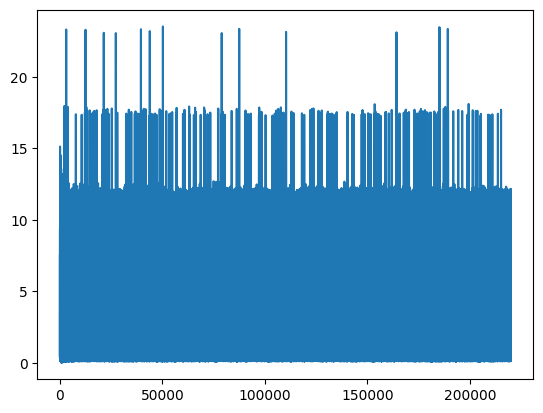

In [102]:
plt.plot(loss_values)

In [103]:
loss_values

[7.526130676269531,
 0.8665679693222046,
 1.2755649089813232,
 1.868241786956787,
 7.813767433166504,
 0.39893537759780884,
 0.7725397944450378,
 0.7606879472732544,
 8.546958923339844,
 1.4797468185424805,
 1.053127646446228,
 1.251582384109497,
 0.6671788692474365,
 2.0720479488372803,
 0.9679366946220398,
 1.7947089672088623,
 1.565860390663147,
 7.407713890075684,
 1.3102234601974487,
 0.6712340116500854,
 0.7105837464332581,
 1.2493977546691895,
 0.49666908383369446,
 0.5658974051475525,
 0.5560460090637207,
 0.43058258295059204,
 0.5571586489677429,
 7.7920637130737305,
 0.8746534585952759,
 1.617104172706604,
 0.7257667779922485,
 1.498518943786621,
 1.4763195514678955,
 1.5082529783248901,
 1.661116123199463,
 0.8644139170646667,
 1.6352605819702148,
 0.8680661916732788,
 1.6498453617095947,
 0.656150221824646,
 1.1459412574768066,
 0.6134591102600098,
 1.533754587173462,
 0.9765803217887878,
 9.405133247375488,
 0.49443840980529785,
 0.9764295220375061,
 0.8608596920967102,
 8

In [82]:
valid_loss_values.index()

TypeError: index expected at least 1 argument, got 0

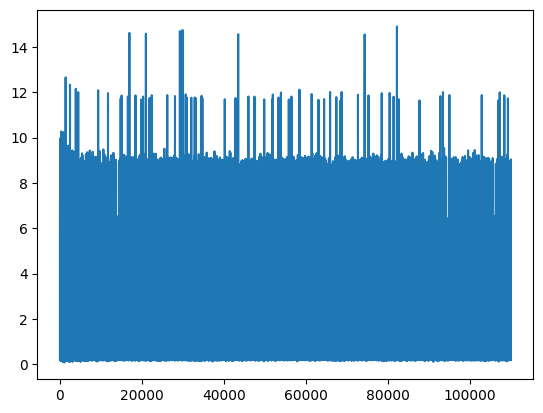

In [40]:
plt.plot(loss_values)

In [81]:
plt.plot(valid_loss_values.index()[::100],valid_loss_values[::100])

TypeError: index expected at least 1 argument, got 0

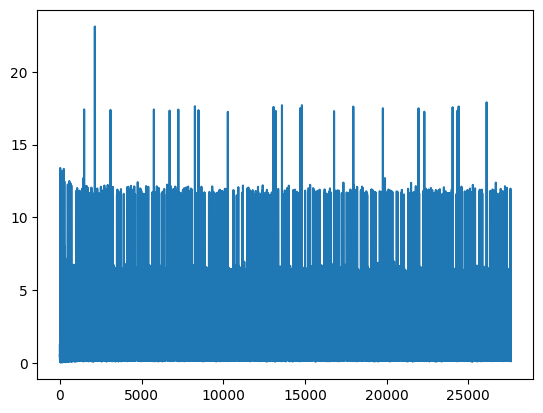

In [80]:
plt.plot(valid_loss_values)

### Saving the loss and validation loss

In [20]:
#np.savetxt('./data/loss_values_b16_e200_remove-999.txt',loss_values)
#np.savetxt('./data/valid_loss_values_b16_e200_remove-999.txt',valid_loss_values)
#np.savetxt('./data/loss_values_b32_e200.txt',loss_values)
#np.savetxt('./data/valid_loss_values_b32_e200.txt',valid_loss_values)
#np.savetxt('./data/loss_values_b64_e300_remove-999.txt',loss_values)
#np.savetxt('./data/valid_loss_values_b64_e300_remove-999.txt',valid_loss_values)

In [3]:
loss_values = np.loadtxt("./data/loss_values_b16_e200.txt")
valid_loss_values = np.loadtxt("./data/valid_loss_values_b16_e200.txt")

## More visualisation

In [24]:
loss_values_b16_e200 = np.loadtxt("./data/loss_values_b16_e200_remove-999.txt")
valid_loss_values_b16_e200 = np.loadtxt("./data/valid_loss_values_b16_e200_remove-999.txt")
loss_values_b32_e200 = np.loadtxt("./data/loss_values_b32_e200_remove-999.txt")
valid_loss_values_b32_e200 = np.loadtxt("./data/valid_loss_values_b32_e200_remove-999.txt")
loss_values_b64_e300 = np.loadtxt("./data/loss_values_b64_e300_remove-999.txt")
valid_loss_values_b64_e300 = np.loadtxt("./data/valid_loss_values_b64_e300_remove-999.txt")

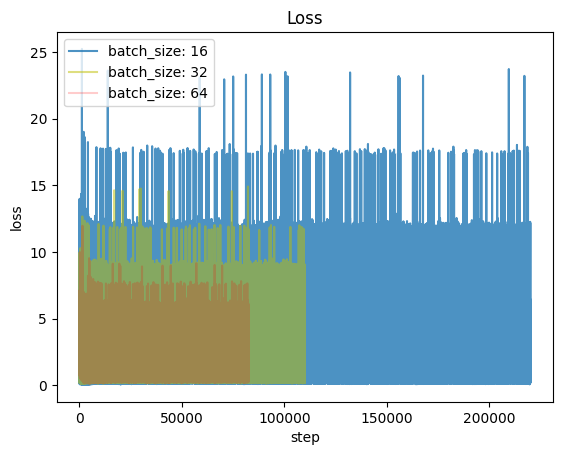

In [111]:
loss_values_b16_e200 = loss_values_b16_e200
loss_values_b32_e200 = loss_values_b32_e200
loss_values_b64_e300 = loss_values_b64_e300
plt.plot(loss_values_b16_e200, label='batch_size: 16', ls='-', ms=20, markevery=100, alpha=0.8)
plt.plot(loss_values_b32_e200,'y', label='batch_size: 32', ls='-', ms=20, markevery=100, alpha=0.5)
plt.plot(loss_values_b64_e300,'r', label='batch_size: 64', ls='-', ms=20, markevery=100, alpha=0.2)
#plt.plot(loss_values,'c', label='batch_size: 32, sigmoid, hidden=16', ls='-', ms=20, markevery=100, alpha=0.5)
#don't know why the markevery doesn't work
plt.xlabel('step') 
plt.ylabel('loss') 
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(valid_loss_values_b16_e200[5000:], label='batch_size: 16')
plt.plot(valid_loss_values_b32_e200[5000:],'y', label='batch_size: 32')
plt.plot(valid_loss_values_b64_e300[5000:],'r', label='batch_size: 64')
plt.xlabel('step') 
plt.ylabel('loss') 
plt.title("Validation Loss")
plt.legend()
plt.show()


## Loading our Saved Model
---

In [104]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

FILE = "model.pth"
data = torch.load(FILE)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
model_state = data["model_state"]

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNet(
  (l1): Linear(in_features=20, out_features=16, bias=True)
  (l2): Linear(in_features=16, out_features=16, bias=True)
  (l3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


 
## Prediction with test dataset:
---

In [105]:
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)
y_pred = model(X_test)
after_train = criterion(y_pred.squeeze(), y_test)
print('Test Loss after training: ', after_train.item())
print('Test Loss before training: ', before_train.item())

Test Loss after training:  1.609398603439331
Test Loss before training:  2.530757427215576


### investigation of the predicted data
the existance of -999 made the model lean towards the negative side.

In [45]:
y_pred_array = y_pred.detach().numpy()

In [46]:

df_describe = pd.DataFrame(y_pred_array)
df_describe.describe()

,0
count,2200.000000
mean,0.630066
std,0.040798
min,0.570898
25%,0.600853
50%,0.623237
75%,0.651423
max,0.794619


In [47]:
df_describe.min()

0    0.570898
dtype: float32

# Bibliography
---


**[1]** 	Wikipedia, "FeedForward Neural Network," Wikipedia, [Online]. Available: https://en.wikipedia.org/wiki/Feedforward_neural_network.

**[2]** 	T. Wood, "Activation Function," DeepAI, [Online]. Available: https://deepai.org/machine-learning-glossary-and-terms/activation-function.
